<a href="https://colab.research.google.com/github/Playmen998/SQL_50_tasks/blob/main/SQL_50_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение


В данном ноутбуке разобраны 50 задач SQL разной сложности (easy, medium, hard). Запросы написаны на разных БД: sqlite3, MySql, Postgresql.  
Задачи были взяты из разных источников:  
Stepik SQL тренажер (https://stepik.org/course/63054/syllabus) - 9 задач  (БД - sqlite3)  
Leetcode (https://leetcode.com/problemset/database/) - 7 задач (БД - sqlite3)  
Stratascratch (https://platform.stratascratch.com/coding?code_type=1) - 24 задач (БД - MySql)  
IT Resume (https://itresume.ru/problems) - 10 задач (БД - Postgresql)


#Подключим sqlite3

Установим последнюю версию sqlite3

In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.50M/6.50M [00:00<00:00, 173MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sqlite3

In [ ]:
sqlite3.sqlite_version

'3.38.0'

Последняя версия sqlite3 на 20.09.22 это 3.38.0

In [ ]:
con = sqlite3.connect('data')

In [ ]:
cur = con.cursor()

Создадим функцию select, чтобы делать запросы к БД 

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

# Stepik

**Все запросы написаны на sqlite3**

## Внесем данные в БД (Тестирование)

In [ ]:
cur.execute("""CREATE TABLE `student` (
`student_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`name_student` varchar(50) DEFAULT NULL
);
""")
con.commit()

In [ ]:
cur.execute("""CREATE TABLE `subject` (
`subject_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`name_subject` varchar(30) DEFAULT NULL
);
""")
con.commit()

In [ ]:
cur.execute("""CREATE TABLE `attempt` (
`attempt_id` INTEGER PRIMARY KEY AUTOINCREMENT,
student_id int DEFAULT NULL,
`subject_id` int DEFAULT NULL,
`date_attempt` date DEFAULT NULL,
`result` int DEFAULT NULL,
CONSTRAINT `attempt_ibfk_1` FOREIGN KEY (`student_id`) REFERENCES `student` (`student_id`) ON DELETE CASCADE,
CONSTRAINT `attempt_ibfk_2` FOREIGN KEY (`subject_id`) REFERENCES `subject` (`subject_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""CREATE TABLE `testing` (
`testing_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`attempt_id` int DEFAULT NULL,
`question_id` int DEFAULT NULL,
`answer_id` int DEFAULT NULL,
CONSTRAINT `testing_ibfk_1` FOREIGN KEY (`attempt_id`) REFERENCES `attempt` (`attempt_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""CREATE TABLE `question` (
`question_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`name_question` varchar(100) DEFAULT NULL, 
`subject_id` int DEFAULT NULL,
CONSTRAINT `question_ibfk_1` FOREIGN KEY (`subject_id`) REFERENCES `subject` (`subject_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""CREATE TABLE `answer` (
`answer_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`name_answer` varchar(100) DEFAULT NULL,
`question_id` int DEFAULT NULL,
`is_correct` tinyint(1) DEFAULT NULL,
CONSTRAINT `answer_ibfk_1` FOREIGN KEY (`question_id`) REFERENCES `question` (`question_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""INSERT INTO student (student_id,name_student) VALUES
(1,'Баранов Павел'),
(2,'Абрамова Катя'),
(3,'Семенов Иван'),
(4,'Яковлева Галина');
""")
con.commit()

In [ ]:
cur.execute("""INSERT INTO attempt (attempt_id,student_id,subject_id,date_attempt,result) VALUES
(1,1,2,'2020-03-23',67),
(2,3,1,'2020-03-23',100),
(3,4,2,'2020-03-26',0),
(4,1,1,'2020-04-15',33),
(5,3,1,'2020-04-15',67),
(6,4,2,'2020-04-21',100),
(7,3,1,'2020-05-17',33);
""")
con.commit()

In [ ]:
cur.execute("""INSERT INTO question (question_id,name_question,subject_id) VALUES
(1,'Запрос на выборку начинается с ключевого слова:',1),
(2,'Условие, по которому отбираются записи, задается после ключевого слова:',1),
(3,'Для сортировки используется:',1),
(4,'Какой запрос выбирает все записи из таблицы student:',1),
(5,'Для внутреннего соединения таблиц используется оператор:',1),
(6,'База данных - это:',2),
(7,'Отношение - это:',2),
(8,'Концептуальная модель используется для',2),
(9,'Какой тип данных не допустим в реляционной таблице?',2);
""")
con.commit()

In [ ]:
cur.execute("""INSERT INTO answer (answer_id,name_answer,question_id,is_correct) VALUES
(1,'UPDATE',1,0),
(2,'SELECT',1,1),
(3,'INSERT',1,0),
(4,'GROUP BY',2,0),
(5,'FROM',2,0),
(6,'WHERE',2,1),
(7,'SELECT',2,0),
(8,'SORT',3,0),
(9,'ORDER BY',3,1),
(10,'RANG BY',3,0),
(11,'SELECT * FROM student',4,1),
(12,'SELECT student',4,0),
(13,'INNER JOIN',5,1),
(14,'LEFT JOIN',5,0),
(15,'RIGHT JOIN',5,0),
(16,'CROSS JOIN',5,0),
(17,'совокупность данных, организованных по определенным правилам',6,1),
(18,'совокупность программ для хранения и обработки больших массивов информации',6,0),
(19,'строка',7,0),
(20,'столбец',7,0),
(21,'таблица',7,1),
(22,'обобщенное представление пользователей о данных',8,1),
(23,'описание представления данных в памяти компьютера',8,0),
(24,'база данных',8,0),
(25,'file',9,1),
(26,'INT',9,0),
(27,'VARCHAR',9,0),
(28,'DATE',9,0);
""")
con.commit()

In [ ]:
cur.execute("""INSERT INTO testing (testing_id,attempt_id,question_id,answer_id) VALUES
(1,1,9,25),
(2,1,7,19),
(3,1,6,17),
(4,2,3,9),
(5,2,1,2),
(6,2,4,11),
(7,3,6,18),
(8,3,8,24),
(9,3,9,28),
(10,4,1,2),
(11,4,5,16),
(12,4,3,10),
(13,5,2,6),
(14,5,1,2),
(15,5,4,12),
(16,6,6,17),
(17,6,8,22),
(18,6,7,21),
(19,7,1,3),
(20,7,4,11),
(21,7,5,16);
""")
con.commit()

Сделаем проверку

In [ ]:
sql = '''select *
from attempt
'''

In [ ]:
select(sql)

,attempt_id,student_id,subject_id,date_attempt,result
0,1,1,2,2020-03-23,67
1,2,3,1,2020-03-23,100
2,3,4,2,2020-03-26,0
3,4,1,1,2020-04-15,33
4,5,3,1,2020-04-15,67
5,6,4,2,2020-04-21,100
6,7,3,1,2020-05-17,33


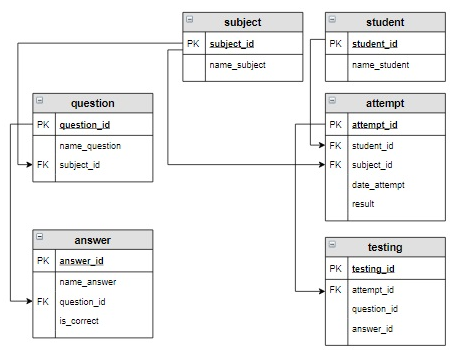

## Задание 1

Вывести студентов, которые сдавали дисциплину «Основы баз данных», указать дату попытки и результат. Информацию вывести по убыванию результатов тестирования.  
https://stepik.org/lesson/310421/step/2?unit=292727

In [ ]:
sql = '''select name_student, date_attempt, result
from attempt
inner join student using(student_id)
inner join subject using(subject_id)
where name_subject = 'Основы баз данных'
order by result desc'''

In [ ]:
select(sql)

,name_student,date_attempt,result
0,Яковлева Галина,2020-04-21,100
1,Баранов Павел,2020-03-23,67
2,Яковлева Галина,2020-03-26,0


## Задание 2

Случайным образом отберите 3 вопроса по дисциплине «Основы баз данных». В результат включите столбцы question_id и name_question.  
https://stepik.org/lesson/310421/step/7?unit=292727 

In [ ]:
sql = '''
select question_id, name_question
from question
where subject_id = (select subject_id
                    from subject
                    where name_subject = 'Основы баз данных')
order by random()
limit 3
'''

In [ ]:
select(sql)

,question_id,name_question
0,6,База данных - это:
1,7,Отношение - это:
2,9,Какой тип данных не допустим в реляционной таб...


## Внесем данные в БД (Абитуриент)

In [ ]:
con = sqlite3.connect('data1')

In [ ]:
cur = con.cursor()

In [ ]:
cur.execute("""
CREATE TABLE department (
`department_id` INTEGER PRIMARY KEY AUTOINCREMENT,
`name_department` VARCHAR(30)
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO department (`department_id`, `name_department`)
VALUES (1, 'Инженерная школа'), (2, 'Школа естественных наук');
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE subject (
    `subject_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `name_subject` VARCHAR(30)
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO subject (`subject_id`, `name_subject`)
VALUES (1, 'Русский язык'), (2, 'Математика'), (3, 'Физика'), (4, 'Информатика');
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE program (
    `program_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `name_program` VARCHAR(50),
    `department_id` INTEGER,
    `plan` INTEGER,
    FOREIGN KEY (`department_id`) REFERENCES `department`(`department_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO program (`program_id`, `name_program`, `department_id`, `plan`)
VALUES (1, 'Прикладная математика и информатика', 2, 2),
(2, 'Математика и компьютерные науки', 2, 1),
(3, 'Прикладная механика', 1, 2),
(4, 'Мехатроника и робототехника', 1, 3);
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE enrollee (
    `enrollee_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `name_enrollee` VARCHAR(50)
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO enrollee (`enrollee_id`, `name_enrollee`)
VALUES (1, 'Баранов Павел'), (2, 'Абрамова Катя'), (3, 'Семенов Иван'),
(4, 'Яковлева Галина'), (5, 'Попов Илья'), (6, 'Степанова Дарья');
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE achievement (
    `achievement_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `name_achievement` VARCHAR(30),
    `bonus` INTEGER
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO achievement (`achievement_id`, `name_achievement`, `bonus`)
VALUES (1, 'Золотая медаль', 5), (2, 'Серебряная медаль', 3),
    (3, 'Золотой значок ГТО', 3),(4, 'Серебряный значок ГТО', 1);
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE enrollee_achievement (
    `enrollee_achiev_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `enrollee_id` INTEGER,
    `achievement_id` INTEGER,
    FOREIGN KEY (`enrollee_id`) REFERENCES `enrollee`(`enrollee_id`) ON DELETE CASCADE,
    FOREIGN KEY (`achievement_id`) REFERENCES `achievement`(`achievement_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO enrollee_achievement (`enrollee_achiev_id`, `enrollee_id`, `achievement_id`)
VALUES (1, 1, 2), (2, 1, 3), (3, 3, 1), (4, 4, 4), (5, 5, 1),(6, 5, 3);
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE program_subject (
    `program_subject_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `program_id` INTEGER,
    `subject_id` INTEGER,
    `min_result` INTEGER,
    FOREIGN KEY (`program_id`) REFERENCES `program`(`program_id`)  ON DELETE CASCADE,
    FOREIGN KEY (`subject_id`) REFERENCES `subject`(`subject_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO program_subject (`program_subject_id`, `program_id`, `subject_id`, `min_result`)
VALUES (1, 1, 1, 40),(2, 1, 2, 50), (3, 1, 4, 60), (4, 2, 1, 30),
       (5, 2, 2, 50),(6, 2, 4, 60), (7, 3, 1, 30),(8, 3, 2, 45),
       (9, 3, 3, 45),(10, 4, 1, 40), (11, 4, 2, 45), (12, 4, 3, 45);
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE program_enrollee (
    `program_enrollee_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `program_id` INTEGER,
    `enrollee_id` INTEGER,
    FOREIGN KEY (`program_id`) REFERENCES `program`(`program_id`) ON DELETE CASCADE,
    FOREIGN KEY (`enrollee_id`) REFERENCES enrollee(`enrollee_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO program_enrollee (`program_enrollee_id`, `program_id`, `enrollee_id`)
VALUES (1, 3, 1), (2, 4, 1), (3, 1, 1), (4, 2, 2), (5, 1, 2),
       (6, 1, 3), (7, 2, 3), (8, 4, 3), (9, 3, 4), (10, 3, 5),
       (11, 4, 5), (12, 2, 6), (13, 3, 6), (14, 4, 6);
""")
con.commit()

In [ ]:
cur.execute("""
CREATE TABLE enrollee_subject (
    `enrollee_subject_id` INTEGER PRIMARY KEY AUTOINCREMENT,
    `enrollee_id` INTEGER,
    `subject_id` INTEGER,
    `result` INTEGER,
    FOREIGN KEY (`enrollee_id`) REFERENCES `enrollee`(`enrollee_id`) ON DELETE CASCADE,
    FOREIGN KEY (`subject_id`) REFERENCES `subject`(`subject_id`) ON DELETE CASCADE
);
""")
con.commit()

In [ ]:
cur.execute("""
INSERT INTO enrollee_subject (`enrollee_subject_id`, `enrollee_id`, `subject_id`, `result`)
VALUES (1, 1, 1, 68), (2, 1, 2, 70), (3, 1, 3, 41), (4, 1, 4, 75), (5, 2, 1, 75), (6, 2, 2, 70),
       (7, 2, 4, 81), (8, 3, 1, 85), (9, 3, 2, 67), (10, 3, 3, 90), (11, 3, 4, 78), (12, 4, 1, 82),
       (13, 4, 2, 86), (14, 4, 3, 70), (15, 5, 1, 65), (16, 5, 2, 67), (17, 5, 3, 60),
       (18, 6, 1, 90), (19, 6, 2, 92), (20, 6, 3, 88), (21, 6, 4, 94);
""")
con.commit()

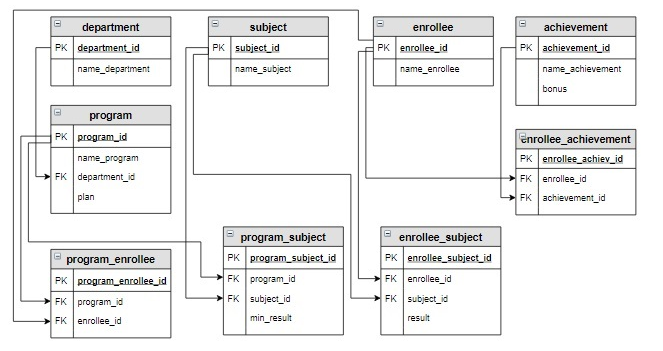

## Задание 3

Вывести образовательные программы, для которых минимальный балл ЕГЭ по каждому предмету больше или равен 40 баллам. Программы вывести в отсортированном по алфавиту виде.  
https://stepik.org/lesson/310418/step/5?unit=292724 

In [ ]:
sql = """
select distinct(name_program) from program
inner join program_subject using(program_id)
group by name_program
having min(min_result) >= 40 
order by name_program
"""

In [ ]:
select(sql)

,name_program
0,Мехатроника и робототехника
1,Прикладная математика и информатика


## Задание 4

Вывести образовательные программы, которые имеют самый большой план набора,  вместе с этой величиной.  
https://stepik.org/lesson/310418/step/6?unit=292724 

In [ ]:
sql = """
select name_program,plan from program
where plan = (select max(plan) from program)
"""

In [ ]:
select(sql)

,name_program,plan
0,Мехатроника и робототехника,3


## Задание 5

Посчитать, сколько дополнительных баллов получит каждый абитуриент. Столбец с дополнительными баллами назвать Бонус. Информацию вывести в отсортированном по фамилиям виде.  
https://stepik.org/lesson/310418/step/7?unit=292724 

In [ ]:
sql = """
select name_enrollee, sum(iif(bonus is not null,bonus,0)) as Бонус
from enrollee
left join enrollee_achievement using(enrollee_id)
left join achievement using(achievement_id)
group by name_enrollee
order by name_enrollee
"""

In [ ]:
select(sql)

,name_enrollee,Бонус
0,Абрамова Катя,0
1,Баранов Павел,6
2,Попов Илья,8
3,Семенов Иван,5
4,Степанова Дарья,0
5,Яковлева Галина,1


## Задание 6

Выведите сколько человек подало заявление на каждую образовательную программу и конкурс на нее (число поданных заявлений деленное на количество мест по плану), округленный до 2-х знаков после запятой. В запросе вывести название факультета, к которому относится образовательная программа, название образовательной программы, план набора абитуриентов на образовательную программу (plan), количество поданных заявлений (Количество) и Конкурс. Информацию отсортировать в порядке убывания конкурса.  
https://stepik.org/lesson/310418/step/8?unit=292724 

In [ ]:
sql = """
select name_department,name_program,plan, count(enrollee_id) as Количество, round(count(enrollee_id)/plan,2) as Конкурс
from program
inner join program_enrollee using(program_id)
inner join department using(department_id)
group by name_department,name_program,plan
order by Конкурс desc
"""

In [ ]:
select(sql)

,name_department,name_program,plan,Количество,Конкурс
0,Школа естественных наук,Математика и компьютерные науки,1,3,3.0
1,Инженерная школа,Прикладная механика,2,4,2.0
2,Инженерная школа,Мехатроника и робототехника,3,4,1.0
3,Школа естественных наук,Прикладная математика и информатика,2,3,1.0


## Задание 7

Вывести образовательные программы, на которые для поступления необходимы предмет «Информатика» и «Математика» в отсортированном по названию программ виде.  
https://stepik.org/lesson/310418/step/9?unit=292724

In [ ]:
sql = '''
select name_program from
(
select name_program,count(name_subject) as cum from program
inner join program_subject using(program_id)
inner join subject using(subject_id)
where name_subject='Информатика' or name_subject='Математика'
group by name_program
having count(name_subject) = 2
) as table1
order by name_program
'''

In [ ]:
select(sql)

,name_program
0,Математика и компьютерные науки
1,Прикладная математика и информатика


## Задание 8

Посчитать количество баллов каждого абитуриента на каждую образовательную программу, на которую он подал заявление, по результатам ЕГЭ. В результат включить название образовательной программы, фамилию и имя абитуриента, а также столбец с суммой баллов, который назвать itog. Информацию вывести в отсортированном сначала по образовательной программе, а потом по убыванию суммы баллов виде.  
https://stepik.org/lesson/310418/step/10?unit=292724

In [ ]:
sql = '''
select name_program,name_enrollee,sum(result) as itog
from program_enrollee
inner join program on program.program_id = program_enrollee.program_id
inner join enrollee_subject on enrollee_subject.enrollee_id = program_enrollee.enrollee_id
inner join program_subject on program_subject.program_id =program.program_id
and enrollee_subject.subject_id = program_subject.subject_id

inner join enrollee on enrollee.enrollee_id = program_enrollee.enrollee_id
group by name_program,name_enrollee
order by name_program, itog desc
'''

In [ ]:
select(sql)

,name_program,name_enrollee,itog
0,Математика и компьютерные науки,Степанова Дарья,276
1,Математика и компьютерные науки,Семенов Иван,230
2,Математика и компьютерные науки,Абрамова Катя,226
3,Мехатроника и робототехника,Степанова Дарья,270
4,Мехатроника и робототехника,Семенов Иван,242
5,Мехатроника и робототехника,Попов Илья,192
6,Мехатроника и робототехника,Баранов Павел,179
7,Прикладная математика и информатика,Семенов Иван,230
8,Прикладная математика и информатика,Абрамова Катя,226
9,Прикладная математика и информатика,Баранов Павел,213


## Задание 9

Вывести название образовательной программы и фамилию тех абитуриентов, которые подавали документы на эту образовательную программу, но не могут быть зачислены на нее. Эти абитуриенты имеют результат по одному или нескольким предметам ЕГЭ, необходимым для поступления на эту образовательную программу, меньше минимального балла. Информацию вывести в отсортированном сначала по программам, а потом по фамилиям абитуриентов виде.  
https://stepik.org/lesson/310418/step/11?unit=292724

In [ ]:
sql = '''
select name_program ,name_enrollee
from enrollee_subject
inner join subject using(subject_id)
inner join program_enrollee using(enrollee_id)
inner join program_subject on program_subject.subject_id = subject.subject_id
and program_subject.program_id = program_enrollee.program_id
inner join program on program.program_id = program_enrollee.program_id
inner join enrollee on enrollee.enrollee_id = enrollee_subject.enrollee_id
where  result<min_result 
order by name_program,name_enrollee
'''

In [ ]:
select(sql)

,name_program,name_enrollee
0,Мехатроника и робототехника,Баранов Павел
1,Прикладная механика,Баранов Павел


# Leetcode

**Все запросы написаны на sqlite3**

## Задачи уровня Easy

### Задание 10

In [ ]:
con = sqlite3.connect('data3')

In [ ]:
cur = con.cursor()

Напишите запрос SQL, чтобы сообщить имя, фамилию, город и состояние каждого человека в Person таблице. Если personId отсутствует в Addressтаблице, сообщите null вместо этого.  
https://leetcode.com/problems/combine-two-tables/  

In [ ]:
sql = '''
Create table If Not Exists Person (personId int, firstName varchar(255), lastName varchar(255))
Create table If Not Exists Address (addressId int, personId int, city varchar(255), state varchar(255))
insert into Person (personId, lastName, firstName) values ('1', 'Wang', 'Allen')
insert into Person (personId, lastName, firstName) values ('2', 'Alice', 'Bob')
insert into Address (addressId, personId, city, state) values ('1', '2', 'New York City', 'New York')
insert into Address (addressId, personId, city, state) values ('2', '3', 'Leetcode', 'California')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql ='''
select p.firstName, p.lastName, a.city, a.state
from Person p
left join Address a on a.personId = p.personId
'''

In [ ]:
select(sql)

,firstName,lastName,city,state
0,Allen,Wang,None,None
1,Bob,Alice,New York City,New York


### Задание 11

Напишите SQL-запрос, чтобы найти сотрудников, которые зарабатывают больше, чем их менеджеры.  
https://leetcode.com/problems/employees-earning-more-than-their-managers/ 

In [ ]:
con = sqlite3.connect('data4')

In [ ]:
cur = con.cursor()

In [ ]:
sql = '''
Create table If Not Exists Employee (id int, name varchar(255), salary int, managerId int)
insert into Employee (id, name, salary, managerId) values ('1', 'Joe', '70000', '3')
insert into Employee (id, name, salary, managerId) values ('2', 'Henry', '80000', '4')
insert into Employee (id, name, salary, managerId) values ('3', 'Sam', '60000', 'None')
insert into Employee (id, name, salary, managerId) values ('4', 'Max', '90000', 'None')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql ='''
select * from
(
select
case when (e.salary - em.salary) > 0 then e.name end as Employee 
from Employee e
join Employee em on em.id = e.managerId
) t
where t.Employee is not null
'''

In [ ]:
select(sql)

,Employee
0,Joe


### Задание 12

Напишите запрос SQL, чтобы сообщить обо всех повторяющихся электронных письмах.  
https://leetcode.com/problems/duplicate-emails/ 

In [ ]:
sql = '''
Create table If Not Exists Person (id int, email varchar(255))
insert into Person (id, email) values ('1', 'a@b.com')
insert into Person (id, email) values ('2', 'c@d.com')
insert into Person (id, email) values ('3', 'a@b.com')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''
select p.email
from Person p
group by p.email
having count(*) > 1
'''

In [ ]:
select(sql)

,email
0,a@b.com


### Задание 13

Напишите SQL-запрос, чтобы сообщить обо всех клиентах, которые никогда ничего не заказывали.
https://leetcode.com/problems/customers-who-never-order/ 

In [ ]:
sql = '''
Create table If Not Exists Customers (id int, name varchar(255))
Create table If Not Exists Orders (id int, customerId int)
insert into Customers (id, name) values ('1', 'Joe')
insert into Customers (id, name) values ('2', 'Henry')
insert into Customers (id, name) values ('3', 'Sam')
insert into Customers (id, name) values ('4', 'Max')
insert into Orders (id, customerId) values ('1', '3')
insert into Orders (id, customerId) values ('2', '1')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''
select name as Customers 
from Customers c
left join Orders o on o.customerId = c.id
where o.customerId is null
'''

In [ ]:
select(sql)

,Customers
0,Henry
1,Max


## Задачи уровня Medium

### Задание 14

Напишите SQL-запрос, чтобы сообщить вторую по величине зарплату из Employee таблицы. Если нет второй по величине зарплаты, запрос должен сообщить null.  
https://leetcode.com/problems/second-highest-salary/ 

In [ ]:
sql = '''
Create table If Not Exists Employee (id int, salary int)
insert into Employee (id, salary) values ('1', '100')
insert into Employee (id, salary) values ('2', '200')
insert into Employee (id, salary) values ('3', '300')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql ='''
select 
case when (dense_rank() over (order by salary desc)) = 2 then salary else null end as SecondHighestSalary 
from Employee e
order by SecondHighestSalary desc
limit 1
'''

In [ ]:
select(sql)

,SecondHighestSalary
0,200


### Задание 15

Напишите SQL-запрос для ранжирования результатов. Рейтинг должен рассчитываться по следующим правилам:

+ Оценки должны быть ранжированы от самого высокого к самому низкому.
+ Если есть ничья между двумя результатами, оба должны иметь одинаковый рейтинг.
+ После ничьей следующим номером рейтинга должно быть следующее последовательное целое число. Другими словами, между рядами не должно быть отверстий.  
https://leetcode.com/problems/rank-scores/ 

In [ ]:
sql = '''
Create table If Not Exists Scores (id int, score DECIMAL(3,2))
insert into Scores (id, score) values ('1', '3.5')
insert into Scores (id, score) values ('2', '3.65')
insert into Scores (id, score) values ('3', '4.0')
insert into Scores (id, score) values ('4', '3.85')
insert into Scores (id, score) values ('5', '4.0')
insert into Scores (id, score) values ('6', '3.65')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql ='''
select s.score,
dense_rank() over (order by s.score desc) as "rank" 
from Scores s
'''

In [ ]:
select(sql)

,score,rank
0,4.00,1
1,4.00,1
2,3.85,2
3,3.65,3
4,3.65,3
5,3.50,4


### Задание 16

Напишите SQL-запрос, чтобы найти сотрудников с самой высокой зарплатой в каждом из отделов.  
https://leetcode.com/problems/department-highest-salary/

In [ ]:
con = sqlite3.connect('data5')

In [ ]:
cur = con.cursor()

In [ ]:
sql = '''
Create table If Not Exists Employee (id int, name varchar(255), salary int, departmentId int)
Create table If Not Exists Department (id int, name varchar(255))
insert into Employee (id, name, salary, departmentId) values ('1', 'Joe', '70000', '1')
insert into Employee (id, name, salary, departmentId) values ('2', 'Jim', '90000', '1')
insert into Employee (id, name, salary, departmentId) values ('3', 'Henry', '80000', '2')
insert into Employee (id, name, salary, departmentId) values ('4', 'Sam', '60000', '2')
insert into Employee (id, name, salary, departmentId) values ('5', 'Max', '90000', '1')
insert into Department (id, name) values ('1', 'IT')
insert into Department (id, name) values ('2', 'Sales')
'''

In [ ]:
sql = ';\n'.join(sql.split('\n'))

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''select distinct d.name as Department ,t.name as Employee , t.salary as Salary 
from (
select e.*,
dense_rank() over (partition by e.departmentId order by e.salary desc) as rnk
from Employee e
) t
left join Department d on d.id = t.departmentId
where  t.rnk = 1'''

In [ ]:
select(sql)

,Department,Employee,Salary
0,IT,Jim,90000
1,IT,Max,90000
2,Sales,Henry,80000


# Stratascratch 

**Все запросы написаны на MySql**

## Задачи уровня Easy

### Задание 17

Сравните зарплату каждого сотрудника со средней зарплатой соответствующего отдела. Выведите отдел, имя и зарплату сотрудников, а также среднюю зарплату этого отдела.  
https://platform.stratascratch.com/coding/9917-average-salaries?code_type=3  

In [ ]:
sql = '''select t.department ,t.first_name, t.salary, a.mean_salary
from employee t
left join 
(
select t.department, avg(t.salary)  as mean_salary
from employee t
group by t.department
) a on a.department = t.department'''

### Задание 18

Найдите детали заказа, сделанного Джилл и Евой. Считайте Джилл и Еву первыми именами клиентов. Выведите дату заказа, детали и стоимость вместе с именем. Записи заказов на основе идентификатора клиента в порядке возрастания.  
https://platform.stratascratch.com/coding/9913-order-details?code_type=3

In [ ]:
sql = '''
select order_date,order_details,total_order_cost,first_name from customers 
inner join orders  on orders.cust_id = customers.id
where first_name in ('Jill','Eva')
'''

### Задание 19

Напишите запрос, вычисляющий разницу между самыми высокими зарплатами в отделах маркетинга и инженерии. Выведите только абсолютную разницу в зарплатах.  
https://platform.stratascratch.com/coding/10308-salaries-differences?code_type=3

In [ ]:
sql = '''
select abs(max(salary) - (select max(salary) 
from db_employee
inner join db_dept on db_dept.id = db_employee.department_id
where department = 'engineering'))
from db_employee
inner join db_dept on db_dept.id = db_employee.department_id
where department = 'marketing';
'''

## Задачи уровня Medium

### Задание 20

Найдите подходящие пары хозяев и гостей, чтобы они были одного пола и национальности. Выведите идентификатор хоста и идентификатор гостя совпадающей пары.  
https://platform.stratascratch.com/coding/10078-find-matching-hosts-and-guests-in-a-way-that-they-are-both-of-the-same-gender-and-nationality?code_type=3 

In [ ]:
sql = '''
select distinct(a.host_id), t.guest_id
from airbnb_guests t
left join airbnb_hosts a on a.nationality = t.nationality and
a.gender = t.gender
'''

### Задание 21

Найдите количество квартир по национальностям, принадлежащих лицам моложе 30 лет. Выведите национальность вместе с количеством квартир. Отсортировать записи по количеству квартир в порядке убывания.  
https://platform.stratascratch.com/coding/10156-number-of-units-per-nationality?code_type=3

In [ ]:
sql = '''
with
group_host as (
select t.* 
from  airbnb_units t
)


select t.nationality, count(*)
from 
(
select distinct t.unit_id, a.nationality
from group_host t
left join airbnb_hosts a on a.host_id = t.host_id
where a.age < 30 and t.unit_type = 'Apartment'
) t
'''

### Задание 22

Найдите лучшие бизнес-категории на основе общего количества отзывов. Выведите категорию вместе с общим количеством отзывов. Упорядочить по общему количеству отзывов в порядке убывания.  
https://platform.stratascratch.com/coding/10049-reviews-of-categories?code_type=3

In [ ]:
sql = '''
WITH numbers AS (
    SELECT 1 AS n
    UNION ALL
    SELECT 2 AS n
    UNION ALL
    SELECT 3 AS n
    UNION ALL
    SELECT 4 AS n
    UNION ALL
    SELECT 5 AS n
    UNION ALL
    SELECT 6 AS n
    UNION ALL
    SELECT 7 AS n
    UNION ALL
    SELECT 8 AS n
    UNION ALL
    SELECT 9 AS n
    UNION ALL
    SELECT 10 AS n
    UNION ALL
    SELECT 11 AS n
    UNION ALL
    SELECT 12 AS n
)

select
    SUBSTRING_INDEX(SUBSTRING_INDEX(t1.categories, ';', t2.n), ';',-1) AS category,
    SUM(t1.review_count) AS review_cnt
from yelp_business as t1
JOIN numbers AS t2 ON LENGTH(t1.categories)-LENGTH(REPLACE(t1.categories, ';', ''))>=t2.n-1
group by category
order by review_cnt desc
'''

### Задание 23

Найдите сотрудника с самой высокой зарплатой в каждом отделе. Выведите название отдела, имя сотрудника и соответствующую зарплату.  
https://platform.stratascratch.com/coding/9897-highest-salary-in-department?code_type=3

In [ ]:
sql = '''
select * 
from employee t
where t.salary in (
select max(t.salary) as max_sal
from employee t
group by t.department
)
'''

### Задание 24

Какие песни вошли в топ-10 рейтинга 2010 года? Выведите ранг, название группы и название песни, но не показывайте одну и ту же песню дважды. Отсортируйте результат на основе year_rank в порядке возрастания.  
https://platform.stratascratch.com/coding/9650-find-the-top-10-ranked-songs-in-2010?code_type=3  

In [ ]:
sql = '''
select distinct(t.group_name), t.year_rank , t.song_name  from
(select * 
from billboard_top_100_year_end t
where t.year = 2010) t
where t.year_rank between 1 and 10
order by  t.year_rank
'''

### Задание 25

Каков общий уровень принятия друзей по дате? В вашем выводе должна быть скорость принятия на дату отправки запроса. Заказ от самой ранней даты до самой поздней.


Предположим, что каждый запрос на добавление в друзья начинается с отправки пользователем (т. е. user_id_sender) запроса на добавление в друзья другому пользователю (т. е. user_id_receiver), который зарегистрирован в таблице с действием = 'sent'. Если запрос принят, в таблице записывается action = 'accepted'. Если запрос не принят, запись о действии = «принято» не регистрируется.  
https://platform.stratascratch.com/coding/10285-acceptance-rate-by-date?tabname=question 

In [ ]:
sql = '''
with
date_04 as (
select t.*,
lag(t.date) over (partition by t.user_id_sender order by t.action) as data_accept,
case when lag(t.date) over (partition by t.user_id_sender order by t.action)
is not null then 1 else 0 end as result
from fb_friend_requests t
order by user_id_sender
)
'''

### Задание 26

Найдите клиента с самой высокой суммой дневных заказов в период с 01.02.2019 по 01.05.2019. Если у клиента было более одного заказа в определенный день, суммируйте стоимость заказа ежедневно. Выведите имя клиента, общую стоимость его товаров и дату.  
https://platform.stratascratch.com/coding/9915-highest-cost-orders?code_type=3

In [ ]:
sql = '''
select t.first_name, sum(o.total_order_cost) as sum_ord, o.order_date
from customers t
left join orders o on o.cust_id = t.id
where order_date BETWEEN '2019-02-01' AND '2019-05-01'
group by t.id, o.order_date
order by sum_ord desc
limit 1
'''

### Задание 27

Классифицируйте каждое предприятие как ресторан, кафе, школу или другое. В названии ресторана должно быть слово "restaurant". Для кафе в названии могут быть слова "cafe", «café» или «coffee». «School» должна быть в названии школы. Все другие предприятия следует классифицировать как «other». Выведите название компании и рассчитанную классификацию.  
https://platform.stratascratch.com/coding/9726-classify-business-type?code_type=3

In [ ]:
sql = '''
select business_name, type from
(select distinct(binary business_name), business_name,
    case
        when business_name like '%restaurant%' then 'restaurant'
        when business_name like '%cafe%' then 'cafe'
        when business_name like '%café%' then 'cafe'
        when business_name like '%coffee%' then 'cafe'
        when business_name like '%school%' then 'school'
        else 'other'
    end type
from sf_restaurant_health_violations) res;
'''

### Задание 28

Найдите олимпиаду с наибольшим количеством спортсменов. Олимпийская игра представляет собой комбинацию года и сезона и находится в столбце 'games'. Выведите Олимпиаду вместе с соответствующим количеством спортсменов.  
https://platform.stratascratch.com/coding/9942-largest-olympics?code_type=3

In [ ]:
sql = '''
select t.games,count(distinct t.name) as num
from olympics_athletes_events t
group by t.games
order by num desc
limit 1
'''

### Задание 29

Найдите среднюю общую компенсацию на основе должностей сотрудников и пола. Общая компенсация рассчитывается путем сложения как оклада, так и премии каждого сотрудника. Однако не каждый сотрудник получает бонус, поэтому не учитывайте при расчете сотрудников без бонусов. Сотрудник может получить более одного бонуса. Выведите должность сотрудника, пол (т. е. пол), а также среднюю общую компенсацию.  
https://platform.stratascratch.com/coding/10077-income-by-title-and-gender?code_type=3 

In [ ]:
sql = '''
with 
bonus as (
select t.worker_ref_id, sum(t.bonus) as bonus
from sf_bonus t
group by t.worker_ref_id
)

select s.employee_title, s.sex, avg(s.salary + t.bonus)
from bonus t
inner join sf_employee s on s.id = t.worker_ref_id 
group by  s.employee_title, s.sex
'''

### Задание 30

Найдите песни, которые заняли первое место. Выведите название трека и количество раз, когда он занимал первое место. Отсортируйте свои записи по количеству раз, когда песня была на верхней позиции в порядке убывания.  
https://platform.stratascratch.com/coding/9991-top-ranked-songs?code_type=3

In [ ]:
sql = '''
select t.trackname, count(*) as num
from spotify_worldwide_daily_song_ranking t
group by t.position,t.trackname
having t.position = 1
order by num desc
'''

### Задание 31

Найдите самую высокую цель, достигнутую сотрудником или сотрудниками, работающими под идентификатором менеджера 13. Выведите имя сотрудника и достигнутую цель. Решение должно показывать самую высокую цель, достигнутую при manager_id=13, и какие сотрудники ее достигли.  
https://platform.stratascratch.com/coding/9905-highest-target-under-manager?code_type=3

In [ ]:
sql = '''
select *
from (select * 
from salesforce_employees t
where t.manager_id = 13) t
where t.target = (
select max(t.target) from 
salesforce_employees t
where t.manager_id = 13
)
'''

### Задание 32

Найдите все винодельни, производящие вина с ароматами сливы, вишни, розы или лесного ореха. Чтобы было проще, ищите только единичные формы упомянутых ароматов. Выводить только уникальные значения винодельни.  
https://platform.stratascratch.com/coding/10026-find-all-wineries-which-produce-wines-by-possessing-aromas-of-plum-cherry-rose-or-hazelnut?code_type=3

In [ ]:
sql = '''
select t.winery
from winemag_p1 t
where (lower(description) like '%plum%' and  description not like '%plump%' 
and  description not like '%plummy%')
or lower(description) like '%cherry%' 
or lower(description) like 'rose%' 
or lower(description) like '%hazelnut%'
group by winery
'''

### Задание 33

Напишите запрос, который будет идентифицировать возвращающихся активных пользователей. Вернувшийся активный пользователь — это пользователь, совершивший вторую покупку в течение 7 дней после любой другой покупки. Выведите список user_id этих вернувшихся активных пользователей.  
https://platform.stratascratch.com/coding/10322-finding-user-purchases?code_type=3

In [ ]:
sql = '''
with
table_data as (
select t.user_id, t.created_at,
lag(t.created_at) over (partition by t.user_id order by t.created_at) as last_data
from amazon_transactions t
),

main_table as (
select t.*, 
case when last_data is not null then abs(DATEDIFF(t.last_data,t.created_at)) end as diff_data
from table_data t
),

active_user_table as ( select t.*,
case when t.diff_data <= 7  then 1 else 0 end as active_user_id
from main_table t
)

select distinct t.user_id
from active_user_table t
where t.active_user_id = 1
'''

## Задачи уровня Hard

### Задание 34

Найдите, сколько раз слова «bull» и «bear» встречаются в тексте. Мы подсчитываем, сколько раз встречаются слова, поэтому такие слова, как «bullish», не должны включаться в наш подсчет. Выведите слова «bull» и «bear» вместе с соответствующим количеством вхождений.  
https://platform.stratascratch.com/coding/9814-counting-instances-in-text?code_type=3

In [ ]:
sql = '''
with
main as (select 
case when t.contents like '%bull%' then 'bull' end as ber,
count(case when t.contents like '%bull%' then 1 end) as cnt
from google_file_store t
union all
select 
case when t.contents like '%bear%' then 'bear' end as ber,
count(case when t.contents like '%bear%' then 1 end) as cnt
from google_file_store t
group by ber
order by cnt desc
limit 2
)

select distinct t.bear, m.cnt from (
select 
case when t.contents like '%bear%' then 'bear' else 'bull' end as bear
from google_file_store t
) t
left join main m on m.ber = t.bear
'''

### Задание 35

Найдите 5 лучших штатов с наибольшим количеством 5-звездочных компаний. Выведите название штата вместе с количеством 5-звездочных предприятий и упорядочите записи по количеству 5-звездочных предприятий в порядке убывания. В случае совпадения количества предприятий вернуть все уникальные состояния. Если два состояния имеют одинаковый результат, отсортируйте их в алфавитном порядке.  
https://platform.stratascratch.com/coding/10046-top-5-states-with-5-star-businesses?code_type=3

In [ ]:
sql = '''
select t.state, t.cnt 
from (
select t.state, count(t.stars) as cnt,
dense_rank() over (order by count(t.stars) desc) as rnk
from yelp_business t
where t.stars = 5
group by t.state
) t
where rnk < 5
'''

### Задание 36

Имея таблицу покупок по дате, рассчитайте процентное изменение дохода по месяцам. Выходные данные должны включать дату года-месяца (ГГГГ-ММ) и процентное изменение, округленное до 2-го десятичного знака, и отсортированное от начала года до конца года. Столбец процентного изменения будет заполняться, начиная со второго месяца, и может быть рассчитан как ((доход в этом месяце - доход в прошлом месяце) / доход в прошлом месяце) * 100.  
https://platform.stratascratch.com/coding/10319-monthly-percentage-difference?code_type=3

In [ ]:
sql = '''
select t.date,
round(((val - LAG(t.val) over ()) / LAG(t.val) over ()) * 100, 2)
from (
select 
DATE_FORMAT(created_at,'%Y-%m') as date, sum(value) as val
from sf_transactions t
group by date
) t
'''

### Задание 37

У вас есть таблица покупок в приложении по пользователям. Пользователи, совершившие первую покупку в приложении, участвуют в маркетинговой кампании, где видят призывы к действию для дополнительных покупок в приложении. Найдите количество пользователей, которые сделали дополнительные покупки в приложении благодаря успеху маркетинговой кампании.


Маркетинговая кампания начинается только через день после первоначальной покупки в приложении, поэтому пользователи, совершившие только одну или несколько покупок в первый день, не учитываются, а также мы не учитываем пользователей, которые со временем покупают только те продукты, которые они приобрели в первый день.
https://platform.stratascratch.com/coding/514-marketing-campaign-success-advanced?code_type=3  

In [ ]:
sql = '''
select  count(distinct user_id)
from
(
select *,
DENSE_RANK() over (partition by t.user_id order by t.created_at) as rnk_date,
DENSE_RANK() over (partition by t.user_id,product_id order by created_at) as rnk_prod
from marketing_campaign t
) t
where t.rnk_date != 1 and t.rnk_prod = 1
'''

### Задание 38

Найдите общее количество загрузок для платных и бесплатных пользователей по дате. Включайте только те записи, в которых неоплачиваемые клиенты имеют больше загрузок, чем платные клиенты. Вывод должен быть сначала отсортирован по самой ранней дате и содержать дату в 3 столбцах, бесплатные загрузки, платные загрузки.  
https://platform.stratascratch.com/coding/10300-premium-vs-freemium?code_type=3

In [ ]:
sql = '''
with
non_paying as (
select  d.date, a.paying_customer, sum(d.downloads) as non_paying
from ms_user_dimension u
left join ms_acc_dimension a on u.acc_id = a.acc_id
left join ms_download_facts d on u.user_id = d.user_id
where paying_customer = 'no'
group by  d.date, a.paying_customer
order by date),

yes_paying as (
select  d.date, a.paying_customer, sum(d.downloads) as yes_paying
from ms_user_dimension u
left join ms_acc_dimension a on u.acc_id = a.acc_id
left join ms_download_facts d on u.user_id = d.user_id
where paying_customer = 'yes'
group by  d.date, a.paying_customer
order by date),

main as (select distinct d.date, n.non_paying
from ms_user_dimension u
left join ms_acc_dimension a on u.acc_id = a.acc_id
left join ms_download_facts d on u.user_id = d.user_id
join non_paying n on n.paying_customer = a.paying_customer
and n.date = d.date

having date not in (
select t.date
from (
select *,
lag(t.sum_down) over (order by date,paying_customer) as pred
from 
(
select a.paying_customer, d.date, sum(d.downloads) as sum_down
from ms_user_dimension u
left join ms_acc_dimension a on u.acc_id = a.acc_id
left join ms_download_facts d on u.user_id = d.user_id
group by a.paying_customer, d.date
order by date
) t
order by date,paying_customer
) t
where paying_customer = 'yes' and (sum_down-pred) >= 0
)
order by date)

select t.date,non_paying,yes_paying
from main t
join yes_paying y on y.date = t.date
'''

### Задание 39

Вам предоставляется таблица поиска арендной недвижимости пользователями. Таблица состоит из результатов поиска и выводит информацию о хосте для искателей. Найдите минимальную, среднюю и максимальную цены аренды для рейтинга популярности каждого хоста. Рейтинг популярности хоста определяется следующим образом: 0 отзывов: Новый От 1 до 5 отзывов: Поднимается От 6 до 15 отзывов: В тренде От 16 до 40 отзывов: Популярный Более 40 отзывов:

Выведите рейтинг популярности хостов и их минимальную, среднюю и максимальную стоимость аренды.  
https://platform.stratascratch.com/coding/9632-host-popularity-rental-prices?code_type=3

In [ ]:
sql = '''
select t.type, min(t.price) as min_price, avg(t.price) as avg_price, max(t.price) as max_prica
from (
select *, concat(price, room_type, host_since, zipcode,number_of_reviews) as id_house, sum(number_of_reviews) as num_sum,
case 
when sum(number_of_reviews) = 0 then 'New' 
when (sum(number_of_reviews) >= 1 and sum(number_of_reviews) <= 5) then 'Rising' 
when sum(number_of_reviews) >= 6 and sum(number_of_reviews) <= 15 then 'Trending Up' 
when sum(number_of_reviews) >= 16 and sum(number_of_reviews) <= 40 then 'Popular' 
when sum(number_of_reviews) > 40  then 'Hot'
end as type
from airbnb_host_searches
group  by id_house
) t
group by t.type
'''

### Задание 40

Найдите процент популярности каждого пользователя на Meta/Facebook. Процент популярности определяется как общее количество друзей, которых пользователь разделил на общее количество пользователей на платформе, а затем преобразовал в процент, умножив на 100. Выведите каждого пользователя вместе с его процентом популярности. Упорядочить записи в порядке возрастания по идентификатору пользователя. Столбцы «user1» и «user2» — это пары друзей.  
https://platform.stratascratch.com/coding/10284-popularity-percentage?code_type=3

In [ ]:
sql = '''
select t.user1, (t.sum_fr / (select count(*) from facebook_friends)) * 100 as popularity 
from
(select t.user1, count(*) as sum_fr
from (
select t.user1, t.user2 
from facebook_friends t
union all
select t.user2, t.user1 
from facebook_friends t
) t
group by t.user1) t
order by t.user1
'''

# IT Resume

**Все запросы написаны на Postgresql**

## Задачи уровня Medium

### Задание 41

Вывести клиентов из таблицы clients, у которых почта удовлетворяет шаблону:

* в основной части почтового адреса присутствует хотя бы одна буква а
* после символа @ идет либо iitp.ru, либо mail.ru  
https://itresume.ru/problems/company-regexp-where

In [ ]:
sql = '''
select id_cl, email
from clients
where email SIMILAR TO '%a%@%' and
(email SIMILAR TO '%@iitp.ru' or email SIMILAR TO '%@mail.ru')
'''

### Задание 42

Вывести названия категорий из таблицы category_an, которые не встречаются в таблице orderitems.  
https://itresume.ru/problems/company-categories-that-not-sold

In [ ]:
sql = '''
select c.name from orderitems o
left join analysis a on a.id_an = o.id_an
full join category_an c on a.id_cat_an = c.id_cat_an
where a.id_cat_an is null
order by c.name 
'''

### Задание 43

В таблице transactions в какой-то момент появилась дублирующаяся строка. Выведите эту строку с помощью оператора GROUP BY.  
https://itresume.ru/problems/company-find-duplicates-with-grouping

In [ ]:
sql = '''
select id_transaction,card_id,maincard_id,date,sum,
type,employee,doc_id, cash_id,  shop_id, doc_type,disc_id,disc_source from transactions 
group by id_transaction,card_id,maincard_id,date,sum,
type,employee,doc_id, cash_id,  shop_id, doc_type,disc_id,disc_source
having count(*) > 1
'''

### Задание 44

Для каждой строки вывести предыдущее и следующее значение sum в рамках текущего документа. Если предыдущего/следующего значения нет, вывести NULL.   
https://itresume.ru/problems/company-next-and-prev

In [ ]:
sql = '''
select id,doc_id,sum,
lead(sum) over(partition by doc_id ORDER BY id) as ld,
lag(sum) over(partition by doc_id ORDER BY id) as lg
from transactions
order by id
'''

### Задание 45

Вывести:
* ID анализа
* его количество продаж в штуках в течение предыдущего года от 01.03.2019 до 01.03.2020 (включительно)
* поле Группа (gr)

Правило формирования групп:
* если количество чеков от 10 (не включительно) до 20 (включительно), то Группа = 1
* если больше 20, то Группа = 2
* если меньше 10 (включительно), то Группа = 0  
https://itresume.ru/problems/year-sales-group

In [ ]:
sql = '''
select an_id, count(*) as amount,
case 
when count(*) <= 10 then 0
when count(*) <= 20 then 1
when count(*) > 20 then 2
end gr
from Analysis
left join Orders on ord_an = an_id
left join Groups on gr_id = an_id
where ord_datetime::DATE >= '2019-03-01' and 
ord_datetime::DATE <= '2020-03-01'
group by an_id
order by an_id
'''

### Задание 46

Нарастающим итогом рассчитать, как увеличивалось количество проданных тестов каждый месяц каждого года с разбивкой по группе.  
https://itresume.ru/problems/monthly-sales-increase

In [ ]:
sql = '''
with sales as (
select  
TO_CHAR(ord_datetime::date, 'yyyy') as year,
TO_CHAR(ord_datetime::date, 'mm') as month,
gr_id as group,
count(ord_an) as cnt
from Orders 
left join Analysis on an_id = ord_an
left join Groups on gr_id = an_group
group by 
TO_CHAR(ord_datetime::date, 'yyyy'),
TO_CHAR(ord_datetime::date, 'mm'),
gr_id
  )
  
select s.year, s.month,
s.group, 
sum(s.cnt) over (partition by s.group,s.year order by s.year, s.month)::integer
from sales s
order by s.group, s.year, s.month
'''

### Задание 47

Задание
Вывести:
* id транзакции
* сумму текущего списания/начисления для данной транзакции
общий баланс (списания - начисления) нарастающим итогом  
https://itresume.ru/problems/company-cumsum 

In [ ]:
sql = '''
with table1 as (
select id_transaction,
case
when type = 0 then sum
else 0-sum end as summ 
from transactions)

select id_transaction, summ,
sum(summ) over (order by id_transaction) as cumsum 
from table1
order by id_transaction 
'''

## Задачи уровня Hard

### Задание 48

Задание
* Необходимо вывести среднюю стоимость 5-ой покупки с разбивкой по городам.

Примечание. Если один и тот же человек совершал покупки, но в разное время, то это считаем за разные покупки.  
https://itresume.ru/problems/alpha-bank-avg-5th-purchase-price

In [ ]:
sql = '''
with table1 as (
select id_customer, town, created_at, price,
row_number() over (partition by town, id_customer order by created_at, p.id) as rw
from Customer c
left join Purchases p on c.id_customer = p.user_id
left join SKUS s on s.id = p.sku_id
  )
  
select town, avg(price) as avg_price_5th_purchase from table1
where rw = 5
group by town
order by avg_price_5th_purchase desc
'''

### Задание 49

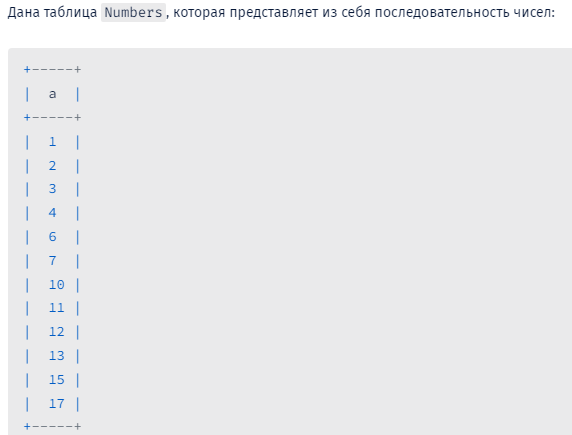

Задание
Задача состоит в том, чтобы вернуть интервалы подряд идущих чисел.  
https://itresume.ru/problems/consecutive-numbers

In [ ]:
sql = '''
with table1 as (
select a, 
row_number() over () as rnk,
a - row_number() over () as iter
from Numbers
  ),
  
table2 as (select distinct
min(a) over (partition by iter) as start,
max(a) over (partition by iter) as end
from table1)

select * from table2 t
order by t.start asc
'''

### Задание 50

Необходимо вывести сотрудников и дни, когда они находились на рабочем месте менее 8 часов.  
https://itresume.ru/problems/employee-gate

In [ ]:
sql = '''
with table1 as (
select employee, check_time::DATE AS check_date,
coalesce(
case
  when is_entered = False
  then check_time - LAG(check_time) over(partition by employee, check_time::date
                                        order by check_time)
  end,
  interval '0'
) as diff
from gate
)

select employee, check_date, SUM(diff) from table1
group by employee, check_date
having SUM(diff) < interval '8 hours'
'''